In [2]:
import matplotlib.pyplot as plt
import dask.dataframe as dd
import pandas as pd

In [3]:
import matplotlib

font = {"size": 10, "weight": "bold"}
matplotlib.rc("font", **font)

In [4]:
import seaborn as sns

In [5]:
import imp

plot = imp.load_source('plot', '../src/plot.py')

In [25]:
clustering_on = ["Normalized_Rank", "Median_score"]
std_features = [
    "CC_to_C_rate",
    "CD_to_C_rate",
    "DC_to_C_rate",
    "DD_to_C_rate",
    "SSE",
    "Makes_use_of_game",
    "Makes_use_of_length",
    "Stochastic",
    "Cooperation_rating",
    "Cooperation_rating_max",
    "Cooperation_rating_min",
    "Cooperation_rating_median",
    "Cooperation_rating_mean",
    "Cooperation_rating_comp_to_max",
    "Cooperation_rating_comp_to_min",
    "Cooperation_rating_comp_to_median",
    "Cooperation_rating_comp_to_mean",
]

In [21]:
#    ddf = dd.from_pandas(df, npartitions=num_of_workers * 4)

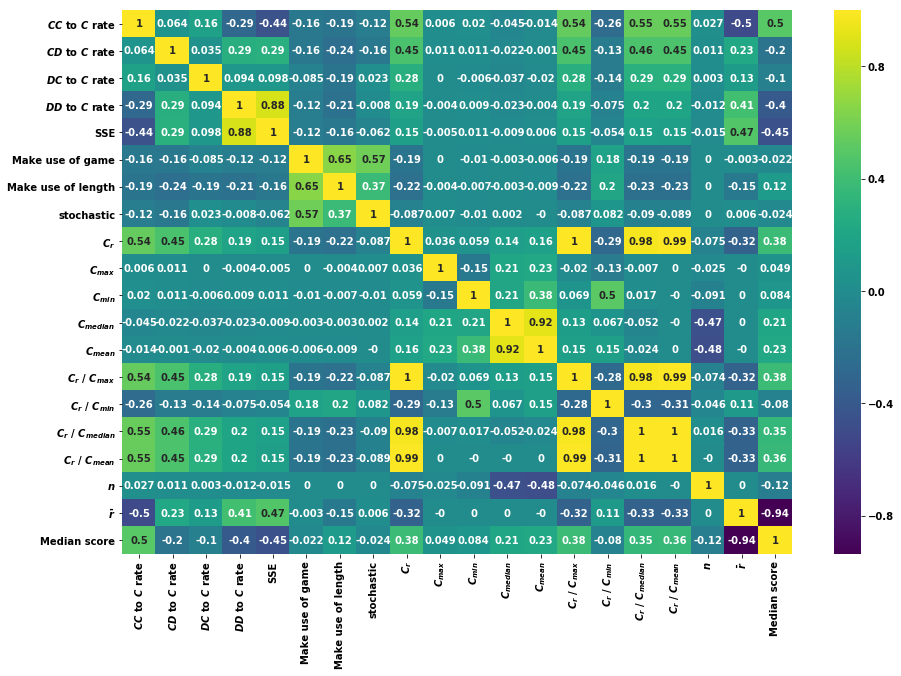

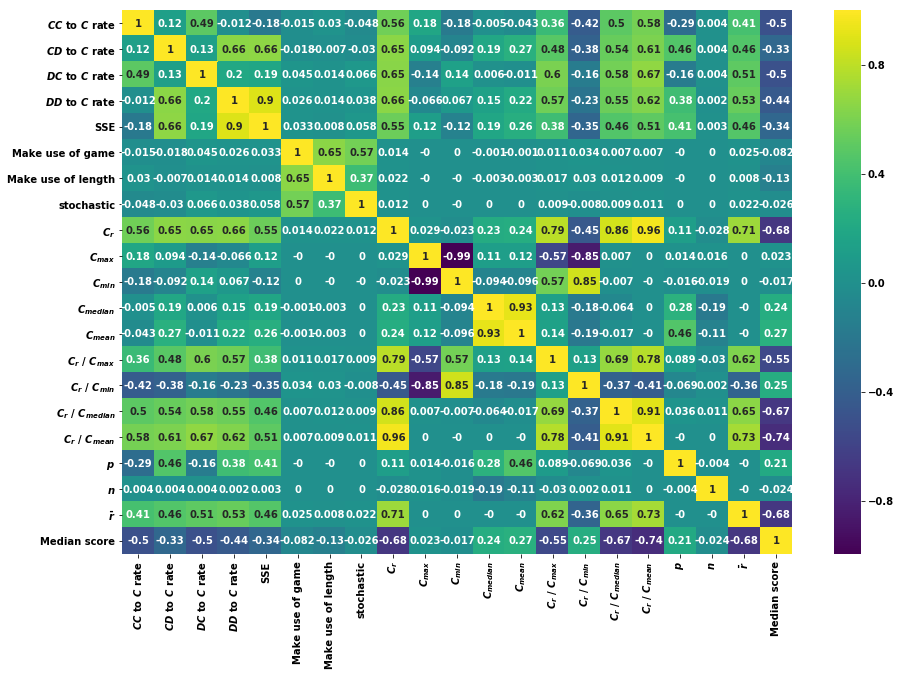

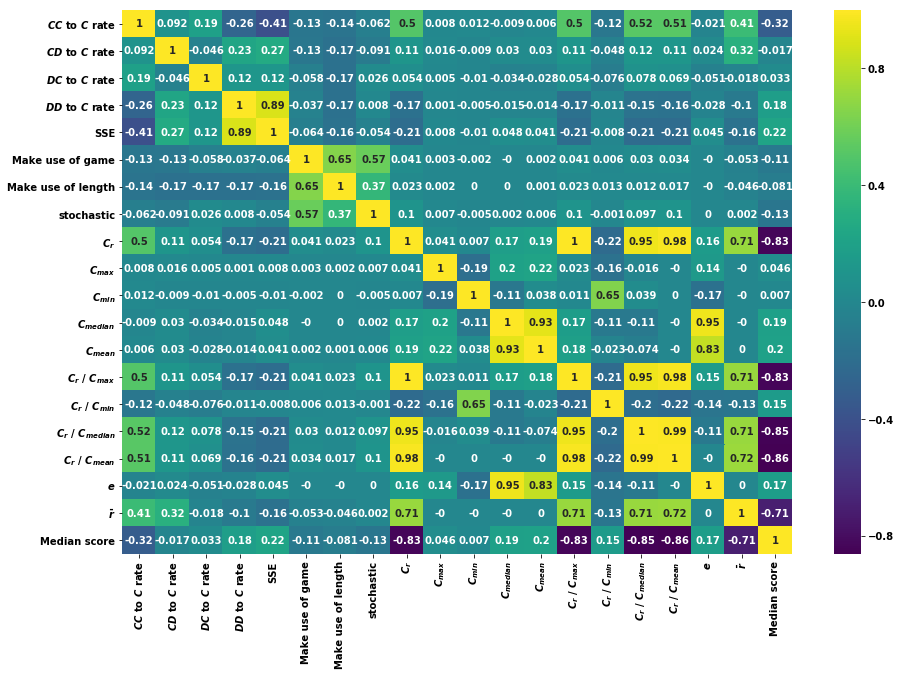

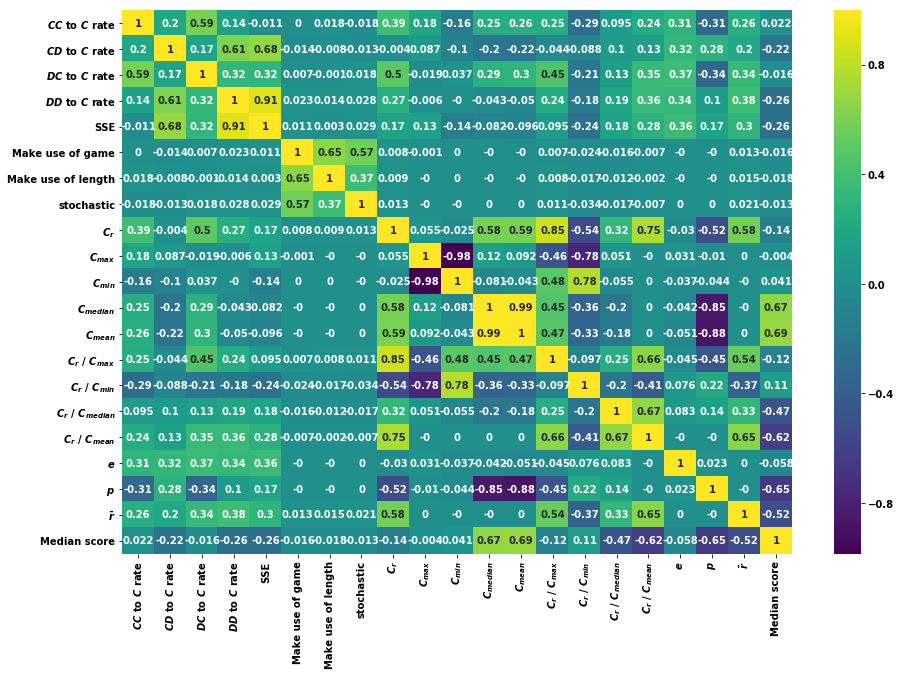

In [30]:
for file in ['standard', 'noise', 'probend', 'probend_noise']:
    df = pd.read_csv('../data/%s_v_3_processed.csv' % file)
    
    features = [
        "CC_to_C_rate",
        "CD_to_C_rate",
        "DC_to_C_rate",
        "DD_to_C_rate",
        "SSE",
        "Makes_use_of_game",
        "Makes_use_of_length",
        "Stochastic",
        "Cooperation_rating",
        "Cooperation_rating_max",
        "Cooperation_rating_min",
        "Cooperation_rating_median",
        "Cooperation_rating_mean",
        "Cooperation_rating_comp_to_max",
        "Cooperation_rating_comp_to_min",
        "Cooperation_rating_comp_to_median",
        "Cooperation_rating_comp_to_mean",
    ]
    
    if file == "standard":
        features += ["turns"]
    if file == "noise":
        features += ["noise", "turns"]
    if file == "probend":
        features += ["probend"]
    if file == "probend_noise":
        features += ["probend", "noise"]
    
    corr_data = df[features + clustering_on]
    corrmat = corr_data.corr()
    top_corr_features = corrmat.index
    
    data = corr_data[top_corr_features].corr().round(3)
    data.columns = [plot.features_labels[feature] for feature in data.columns]
    data.index = [plot.features_labels[feature] for feature in corr_data.corr().index]
    
    plt.figure(figsize=(15, 10))

    sns.heatmap(data,
                annot=True,
                cmap="viridis",);

    plt.savefig(
        "../images/%s_correlation_plot.pdf" % file, bbox_inches="tight"
    )

In [31]:
dfs = []
for file in ['standard', 'noise', 'probend', 'probend_noise']:
    df = pd.read_csv('../data/%s_v_3_processed.csv' % file)
    
    features = [
        "CC_to_C_rate",
        "CD_to_C_rate",
        "DC_to_C_rate",
        "DD_to_C_rate",
        "SSE",
        "Makes_use_of_game",
        "Makes_use_of_length",
        "Stochastic",
        "Cooperation_rating",
        "Cooperation_rating_max",
        "Cooperation_rating_min",
        "Cooperation_rating_median",
        "Cooperation_rating_mean",
        "Cooperation_rating_comp_to_max",
        "Cooperation_rating_comp_to_min",
        "Cooperation_rating_comp_to_median",
        "Cooperation_rating_comp_to_mean",
    ]
    if file == "standard":
        features += ["turns"]
    if file == "noise":
        features += ["noise", "turns"]
    if file == "probend":
        features += ["probend"]
    if file == "probend_noise":
        features += ["probend", "noise"]
    
    corr_data = df[features + clustering_on].corr()
    table = corr_data[clustering_on].iloc[:-2].round(3)
    table.index = [plot.features_labels[index] for index in table.index]
    
    textfile = open('../paper/correlation_table_%s.tex' % file, 'w')
    textfile.write(table.to_latex().replace('\$', '$').replace('\_', '_').replace('\{', '{').replace('\}', '}'))
    textfile.close()

In [ ]:
dfs = []
for file in ['merge']:
    df = pd.read_csv('../data/%s_v_3_processed.csv' % file)
    
    features = [
        "CC_to_C_rate",
        "CD_to_C_rate",
        "DC_to_C_rate",
        "DD_to_C_rate",
        "SSE",
        "Makes_use_of_game",
        "Makes_use_of_length",
        "Stochastic",
        "Cooperation_rating",
        "Cooperation_rating_max",
        "Cooperation_rating_min",
        "Cooperation_rating_median",
        "Cooperation_rating_mean",
        "Cooperation_rating_comp_to_max",
        "Cooperation_rating_comp_to_min",
        "Cooperation_rating_comp_to_median",
        "Cooperation_rating_comp_to_mean",
        "turns",
        "probend",
        "noise"
        
    ]
    
    corr_data = df[features + clustering_on].corr()
    table = corr_data[clustering_on].iloc[:-2].round(3)
    table.index = [plot.features_labels[index] for index in table.index]
    
#     textfile = open('../paper/correlation_table_%s.tex' % file, 'w')
#     textfile.write(table.to_latex().replace('\$', '$').replace('\_', '_').replace('\{', '{').replace('\}', '}'))
#     textfile.close()